# Intitial Setup

In [4]:
!pip install -Uqq fastbook
!pip install pandas
!pip install shutil
import shutil
import pandas as pd
import fastbook
import os
fastbook.setup_book()
from fastai.vision.all import *

ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


# Gathering Data


In [8]:
# The dataset used to build this model was taken from Kaggle
# The dataset contained a CSV file defining whether each image contained a tumor or not and 3762 CT-scan images of the brain
# Kaggle URL: https://www.kaggle.com/jakeshbohaju/brain-tumor
path = Path('./TumorData')
if not path.exists():
  path.mkdir()
file_extract(Path('./gdrive/MyDrive/Colab Notebooks/CancerTumorData.zip'), path)
active_tumors = Path('./TumorData/TumorPresent')
if not active_tumors.exists():
  active_tumors.mkdir()
inactive_tumors = Path('./TumorData/NoTumor')
if not inactive_tumors.exists():
  inactive_tumors.mkdir()
tumorDF = pd.read_csv(Path('./TumorData/Brain Tumor.csv'), usecols = ['Image', 'Class'])
img_labels = list()
M_or_B = list()
for i in range(len(tumorDF)):
  img_labels.append(tumorDF.iloc[i].Image + '.jpg')
  if tumorDF.iloc[i].Class == 1:
    M_or_B.append('TumorPresent')
  else:
    M_or_B.append('NoTumor')
fns = [fn for fn in os.listdir(Path('./TumorData/Brain Tumor/Brain Tumor'))]
for fn in fns:
  ind = img_labels.index(fn)
  shutil.move(Path('./TumorData/Brain Tumor/Brain Tumor' + '/' + fn), Path('./TumorData/' + M_or_B[ind] + '/' + fn))


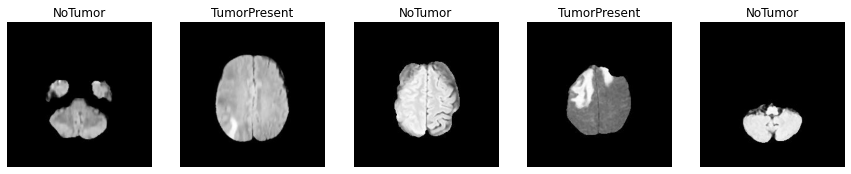

In [9]:
tumors = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42)
)
dls = tumors.dataloaders(path)
dls.valid.show_batch(max_n = 5, nrows = 1)

# Building the Model

In [10]:
model = cnn_learner(dls, resnet34, metrics=error_rate)
model.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,0.596672,0.329343,0.128989,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.314050,0.210062,0.065160,00:26
1,0.165309,0.098305,0.038564,00:27


# Testing the Model

## Testing a CT scan containing a tumor


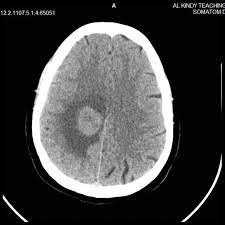

In [11]:
BrainTumor = PILImage.create(Path('./gdrive/MyDrive/Colab Notebooks/BrainTumor.jpeg'))
BrainTumor.to_thumb(240)

In [13]:
model.predict(BrainTumor)

('TumorPresent', tensor(1), tensor([0.1517, 0.8483]))

## Testing a tumor-free CT scan

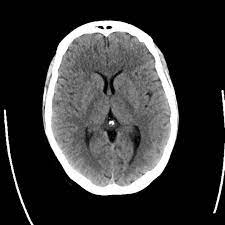

In [17]:
TumorFree = PILImage.create(Path('./gdrive/MyDrive/Colab Notebooks/NoTumor.jpeg'))
TumorFree.to_thumb(240)

In [18]:
model.predict(TumorFree)

('NoTumor', tensor(0), tensor([0.6152, 0.3848]))